# cricket player(batman) performance prediction

Cricket player performance prediction is a model which can predict the runs made by a batsman with certain number of balls faced and within a certain over. It consists of a dataset with of players with their past performance records. The model simply analyses the past performance of that certain player along with the other attributes and returns a predicted value.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df_bat=pd.read_csv("Datasets/Batsman_Data.csv")

In [8]:
df_bat

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,11145,46,46,61,75.40,6,1,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11145,11146,3,3,6,50.00,0,0,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11146,11147,1,1,8,12.50,0,0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048
11147,11148,DNB,-,-,-,-,-,v Scotland,Edinburgh,10 May 2019,ODI # 4131,Gulbadin Naib,352048


Things that we can do with the Data:

Eliminate rows with DNB (Did not bat)
Highest score from a batsman
Hoghest strik rate
Most number of 4s and 6s (boundaries
Grouping matches by the teams against they have played
Strike rate vs The Score data of Each player
Important columns: Bat1, Runs, SR, 4s, 6s, Opp, Ground, Batsman, PlayerID

In [9]:
#Seeing the initial data types of all columns
df_bat.dtypes

Unnamed: 0     int64
Bat1          object
Runs          object
BF            object
SR            object
4s            object
6s            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Batsman       object
Player_ID      int64
dtype: object

In [10]:
df_bat.drop(df_bat[df_bat.Bat1 == 'DNB'].index, inplace=True)
df_bat.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0*,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [11]:
df_bat['Bat1'] = df_bat['Bat1'].str.replace('*', '.')
df_bat['SR'] = df_bat['SR'].str.replace('-', '0')
df_bat['Runs'] = df_bat['Runs'].str.replace('-', '0')
df_bat['4s'] = df_bat['4s'].str.replace('-', '0')
df_bat['6s'] = df_bat['6s'].str.replace('-', '0')
df_bat.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0.,0,0,0,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0.,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [15]:
#Converting all required columns into float
df_bat['SR']=df_bat['SR'].astype(float)
df_bat['Runs']=df_bat['Runs'].astype(float)
df_bat['4s']=df_bat['4s'].astype(float)
df_bat['6s']=df_bat['6s'].astype(float)

In [16]:
#Checking the datatype
df_bat.dtypes

Unnamed: 0      int64
Bat1           object
Runs          float64
BF             object
SR            float64
4s            float64
6s            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Batsman        object
Player_ID       int64
dtype: object

In [17]:
#Top 100 batsmen with highest macthes/data
new = df_bat['Batsman'].value_counts()[:100]
new

Batsman
MS Dhoni               294
Chris Gayle            288
Shoaib Malik           255
Virat Kohli            222
Ross Taylor            209
                      ... 
Hasan Ali               26
Shimron Hetmyer         25
Andile Phehlukwayo      25
Milinda Siriwardana     24
Kagiso Rabada           24
Name: count, Length: 100, dtype: int64

In [18]:
#Gathering Data of reqd Batsman induvidually
df_bat_induvidual = df_bat.query('Batsman =="Shimron Hetmyer"')
df_bat_induvidual

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
367,368,29,29.0,42,69.04,4.0,0.0,v New Zealand,Whangarei,20 Dec 2017,ODI # 3943,Shimron Hetmyer,670025
368,369,2,2.0,4,50.00,0.0,0.0,v New Zealand,Christchurch,23 Dec 2017,ODI # 3944,Shimron Hetmyer,670025
369,370,127,127.0,93,136.55,14.0,4.0,v U.A.E.,Harare,6 Mar 2018,ODI # 3987,Shimron Hetmyer,670025
370,371,8,8.0,12,66.66,1.0,0.0,v P.N.G.,Harare,8 Mar 2018,ODI # 3991,Shimron Hetmyer,670025
371,372,36,36.0,40,90.00,3.0,1.0,v Ireland,Harare,10 Mar 2018,ODI # 3993,Shimron Hetmyer,670025
372,373,15,15.0,22,68.18,1.0,0.0,v Afghanistan,Harare,15 Mar 2018,ODI # 3997,Shimron Hetmyer,670025
373,374,13,13.0,7,185.71,0.0,1.0,v Zimbabwe,Harare,19 Mar 2018,ODI # 4002,Shimron Hetmyer,670025
374,375,4,4.0,11,36.36,0.0,0.0,v Scotland,Harare,21 Mar 2018,ODI # 4004,Shimron Hetmyer,670025
375,376,38,38.0,51,74.50,3.0,0.0,v Afghanistan,Harare,25 Mar 2018,ODI # 4007,Shimron Hetmyer,670025
376,377,52,52.0,78,66.66,5.0,0.0,v Bangladesh,Providence,22 Jul 2018,ODI # 4022,Shimron Hetmyer,670025


In [19]:
#Gathering some important data from the required Batsman
print("The highest number of score for this batsman is: ")
print(df_bat_induvidual['Runs'].max())
print("The highest Strike Rate for this batsman is: ")
print(df_bat_induvidual['SR'].max())
print("The most number of 4s for this batsman is: ")
print(df_bat_induvidual['4s'].max())
print("The most number of 6s score for this batsman is: ")
print(df_bat_induvidual['6s'].max())

The highest number of score for this batsman is: 
127.0
The highest Strike Rate for this batsman is: 
300.0
The most number of 4s for this batsman is: 
14.0
The most number of 6s score for this batsman is: 
7.0


Grouping matches against a particular batsman for a particular team

In [20]:
#Getting the data of a particular batsman against a particular Team
againstindia = df_bat_induvidual.query('Opposition == "v India"')
againstindia

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
379,380,106,106.0,78,135.89,6.0,6.0,v India,Guwahati,21 Oct 2018,ODI # 4056,Shimron Hetmyer,670025
380,381,94,94.0,64,146.87,4.0,7.0,v India,Visakhapatnam,24 Oct 2018,ODI # 4059,Shimron Hetmyer,670025
381,382,37,37.0,21,176.19,2.0,3.0,v India,Pune,27 Oct 2018,ODI # 4062,Shimron Hetmyer,670025
382,383,13,13.0,11,118.18,2.0,0.0,v India,Mumbai (BS),29 Oct 2018,ODI # 4063,Shimron Hetmyer,670025
383,384,9,9.0,11,81.81,1.0,0.0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Shimron Hetmyer,670025


<BarContainer object of 5 artists>

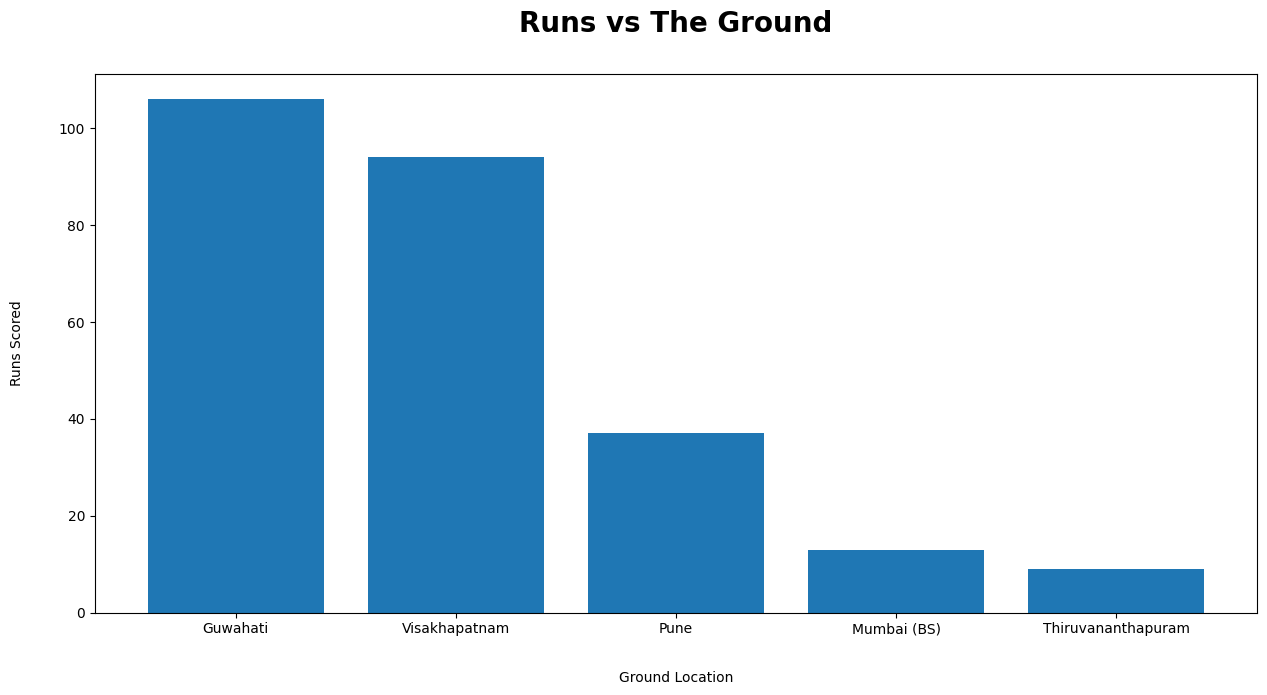

In [21]:
plt.figure(figsize=(15,7))
x = againstindia['Ground']
y = againstindia['Runs']
plt.xlabel('Ground Location', labelpad=25)
plt.ylabel('Runs Scored', labelpad=25)
plt.title('Runs vs The Ground', fontweight='bold', pad=30, fontsize=20)
plt.bar(x, y)

Strike Rate vs Runs of Batsman

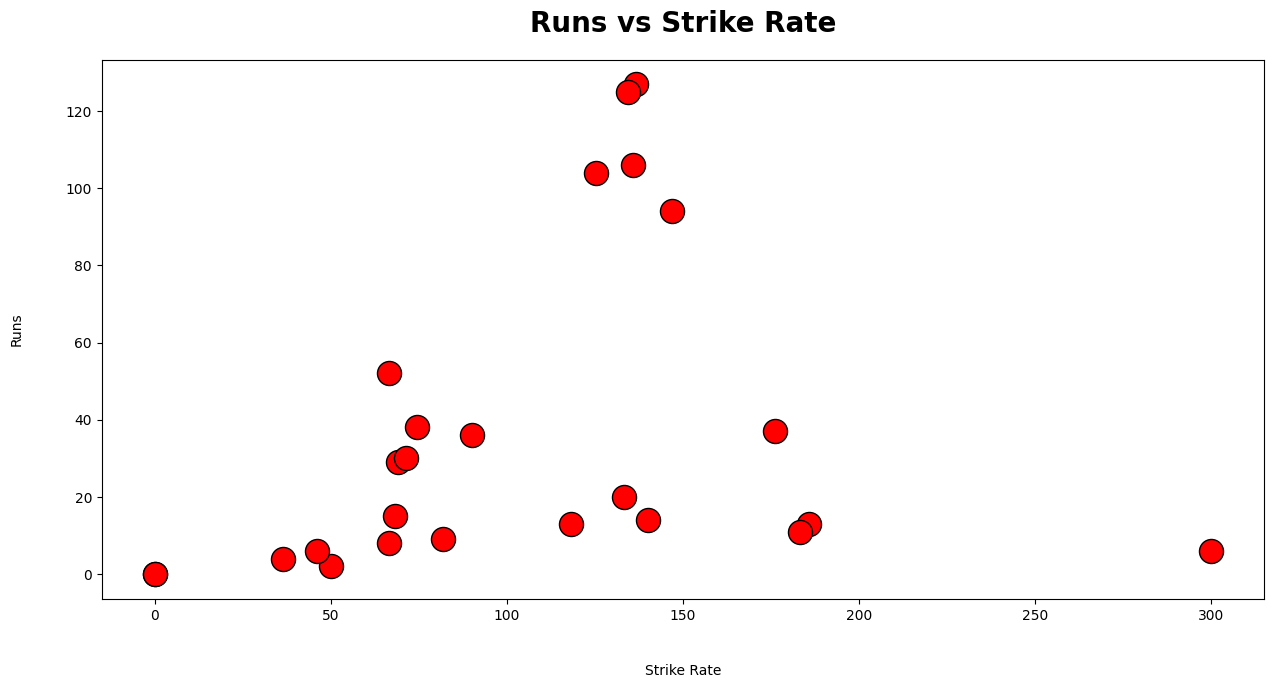

In [22]:
plt.figure(figsize=(15,7))
x = df_bat_induvidual['SR']
y = df_bat_induvidual['Runs']
plt.xlabel('Strike Rate', labelpad=30)
plt.ylabel('Runs', labelpad=30)
plt.title('Runs vs Strike Rate', fontweight='bold', pad=20, fontsize=20)
plt.scatter(x, y, color='red', s=300, edgecolor='black')

Grouping Matches by the opposition on whole

In [24]:
df_bat_opposition = df_bat.query('Opposition =="v England"')
df_bat_opposition

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6,7,0.,0.0,0,0.00,0.0,0.0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1.0,3,33.33,0.0,0.0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
26,27,4.,4.0,5,80.00,0.0,0.0,v England,The Oval,22 May 2014,ODI # 3492,Oshane Thomas,49619
43,44,7,7.0,8,87.50,0.0,0.0,v England,Nottingham,21 Jun 2016,ODI # 3751,Oshane Thomas,49619
45,46,3.,3.0,4,75.00,0.0,0.0,v England,Bristol,26 Jun 2016,ODI # 3755,Oshane Thomas,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10284,10285,22,22.0,17,129.41,3.0,1.0,v England,Manchester,24 Jun 2018,ODI # 4013,Aaron Finch,5334
10350,10351,7,7.0,11,63.63,1.0,0.0,v England,Sydney,13 Mar 2015,ODI # 3635,Samiullah Shinwari,318339
10504,10505,12.,12.0,15,80.00,2.0,0.0,v England,Sydney,13 Mar 2015,ODI # 3635,Najibullah Zadran,524049
10704,10705,16,16.0,17,94.11,1.0,1.0,v England,Sydney,13 Mar 2015,ODI # 3635,Mohammad Nabi,25913


In [25]:
print("The highest number of score against this team is: ")
print(df_bat_opposition['Runs'].max())
print("The highest Strike Rate against this team is: ")
print(df_bat_opposition['SR'].max())
print("The most number of 4s against this team is: ")
print(df_bat_opposition['4s'].max())
print("The most number of 6s against this team is: ")
print(df_bat_opposition['6s'].max())

The highest number of score against this team is: 
189.0
The highest Strike Rate against this team is: 
400.0
The most number of 4s against this team is: 
19.0
The most number of 6s against this team is: 
14.0


Encoding using dummies

In [34]:
t3newbr=df_bat.copy()
t3newbr

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.,0,8,0,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0.,0,0,0,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1,3,33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0.,0,2,0,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,11144,15,15,46,32,1,0,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Gulbadin Naib,352048
11144,11145,46,46,61,75,6,1,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11145,11146,3,3,6,50,0,0,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11146,11147,1,1,8,12,0,0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048


In [38]:
# pd.get_dummies(t3newbr['Player']).head()
import re

dummies = pd.get_dummies(t3newbr[['Batsman','Opposition']],prefix='').astype(int)
dummies.rename(columns=lambda x: re.sub(r'_v', '', x), inplace=True)
dummies.rename(columns=lambda y: re.sub(r'_', '', y), inplace=True)
# dummies.rename(columns=lambda x: x.replace('_', ''), inplace=True)
dummies.astype(float)

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Netherlands,New Zealand,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
mergfile = pd.concat([dummies,t3newbr],axis='columns')
mergfile.describe()

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,Sri Lanka,U.A.E.,West Indies,Zimbabwe,Unnamed: 0,Runs,SR,4s,6s,Player_ID
count,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,...,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9106.000000,9.106000e+03
mean,0.011860,0.000329,0.001977,0.004393,0.001537,0.001977,0.001867,0.007577,0.002745,0.004832,...,0.110916,0.005491,0.077312,0.073907,5651.905667,28.116626,76.030310,2.547441,0.528662,2.119351e+05
std,0.108263,0.018149,0.044419,0.066135,0.039182,0.044419,0.043170,0.086723,0.052328,0.069348,...,0.314045,0.073901,0.267100,0.261634,3233.426797,31.759340,50.986149,3.219927,1.170994,1.856659e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.334000e+03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2895.250000,5.000000,47.000000,0.000000,0.000000,4.482800e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5755.500000,17.000000,75.000000,1.000000,0.000000,2.277600e+05
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8517.500000,41.000000,100.000000,4.000000,1.000000,3.183400e+05
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,11149.000000,264.000000,600.000000,33.000000,16.000000,1.158100e+06


In [47]:
final = mergfile.drop(['Batsman','Opposition','4s','6s','Player_ID','SR'],axis='columns')
final

,Aaron Finch,Abid Ali,Adam Zampa,Adil Rashid,Aftab Alam,Aiden Markram,Alex Carey,Alex Hales,Andile Phehlukwayo,Andre Russell,...,U.A.E.,West Indies,Zimbabwe,Unnamed: 0,Bat1,Runs,BF,Ground,Start Date,Match_ID
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0.,0,8,Dhaka,10 Jan 2010,ODI # 2941
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,0.,0,0,The Oval,28 Jun 2011,ODI # 3165
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,10,1.,1,3,Nottingham,6 Jul 2011,ODI # 3169
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,0.,0,2,Pallekele,10 Aug 2011,ODI # 3175
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,0,0,2,Dubai (DSC),11 Nov 2011,ODI # 3212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11144,15,15,46,Dubai (DSC),25 Sep 2018,ODI # 4046
11144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11145,46,46,61,Dehradun,28 Feb 2019,ODI # 4100
11145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11146,3,3,6,Dehradun,2 Mar 2019,ODI # 4101
11146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11147,1,1,8,Dehradun,8 Mar 2019,ODI # 4108


In [60]:
final.dtypes

Aaron Finch      int32
Abid Ali         int32
Adam Zampa       int32
Adil Rashid      int32
Aftab Alam       int32
                 ...  
Runs             int32
BF              object
Ground          object
Start Date      object
Match_ID        object
Length: 177, dtype: object

In [75]:
demo = final[['MS Dhoni ',' New Zealand','Runs','BF']]

In [84]:
demo['BF'] = demo['BF'].str.replace('-', '0')

C:\Users\sanja\AppData\Local\Temp\ipykernel_27972\192798646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['BF'] = demo['BF'].str.replace('-', '0')


# Training and Testing Model
Dividing into X and Y variables

In [85]:
from sklearn.model_selection import train_test_split
X= demo.drop(['Runs'],axis=1)
Y = demo['Runs']
train_X, test_X, train_Y,test_Y = train_test_split(X, Y, test_size=0.20, shuffle=True)

In [86]:
comp=dict()

# Prediction
Using various types of regressors to get the best accuracy

# Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(test_X,test_Y)

DecisionTreeRegressor()

In [88]:
tree=tree.score(test_X,test_Y)
comp['tree']=tree

# K Neighbors Regressor

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(test_X,test_Y)

KNeighborsRegressor()

In [90]:
knr=knr.score(test_X,test_Y)
comp['knr']=knr

# RandomForestRegressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
fors = RandomForestRegressor()
fors.fit(test_X,test_Y)

RandomForestRegressor()

In [92]:
fors=fors.score(test_X,test_Y)
comp['fors']=fors

# Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li.fit(test_X,test_Y)

LinearRegression()

In [94]:
li=li.score(test_X,test_Y)
comp['li']=li

# SVR

In [95]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(test_X,test_Y)

SVR()

In [96]:
sv=sv.score(test_X,test_Y)
comp['sv']=sv

# Comparison between Regressors

<BarContainer object of 5 artists>

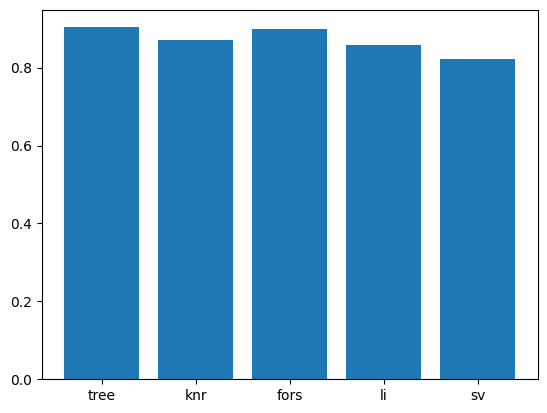

In [97]:
keys = list(comp.keys())
val = list(comp.values())
plt.bar(keys,val)

After comparison between the regressors , we can see that Decision Tree Regressor is having the highest accuracy, and which is best for our model. Therefore we choose Decision Tree Regressor

# Selecting Decision Tree Regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(test_X,test_Y)

DecisionTreeRegressor()

# Predicting Runs of a Specific Player

In [100]:
player = input('enter the name')
opposition = input('enter opposition team')
demo = final[[player,opposition,'Runs','BF']]
bf=float(input('enter balls faced'))
tree.fit(test_X,test_Y)
preds=tree.predict([[1,1,bf]])
preds.astype(int).tolist()

print(player+"'s overall run predicted is",preds,"Against",opposition)

enter the name Hardik Pandya
enter opposition team  England
enter balls faced 25


Hardik Pandya's overall run predicted is [20.] Against  England


C:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Accuracy

In [101]:
tree.score(test_X,test_Y)

0.9036708617990078

# Conclusion


After selecting the most accurate regressor, as given above it gave the total accuracy of 99% which is almost the same as the original value. Therefore our variables got trained well and now it can predict accurate runs with the parameters we provide. By adding more features such as the pitch state, toss results etc, this might make variation in the accuracy therefore we might have to change the regressors based on the value it produces but the predictions can be further improved